## Entrega 7
### <b>Ignacio Ziccardi</b>

### <b>Primeras nociones de estimación espectral: Ancho de banda de señales.</b><br><br>En el repositorio PDStestbench encontrará tres tipos de señales registradas:
### <ul><li>Electrocardiograma (ECG). En el archivo ECG_TP4.mat encontrará un registro electrocardiográfico (ECG) registrado durante una prueba de esfuerzo, junto con una serie de variables descriptas más abajo.</li><li>Pletismografía (PPG). El archivo PPG.csv contiene una señal registrada en reposo de un estudiante de la materia que ha donado su registro para esta actividad.</li><li>Audio. Tres registros en los que el profesor pronuncia una frase, y otros dos en los que se silba una melodía muy conocida.</li></lu><br> Nota: Los detalles de cómo acceder a dichos registros se obtuvieron al estudiar el archivo lectura_sigs.py provisto por el docente.<br>Se pide: <br><br><ol><li>Realizar la estimación de la densidad espectral de potencia (PSD) de cada señal mediante alguno de los métodos vistos en clase (Periodograma ventaneado, Welch, Blackman-Tukey).</li><li>Realice una estimación del ancho de banda de cada señal y presente los resultados en un tabla para facilitar la comparación.</li>

In [1]:
#Importo lo necesario
import numpy as np
from scipy import signal as sig

import matplotlib.pyplot as plt
   
import scipy.io as sio

In [33]:
Fo = 1.0
Fs = 1000.0 # frecuencia de muestreo (Hz)
N = 1000   # cantidad de muestras
ts = 1/Fs # tiempo de muestreo
df = Fs/N # resolución espectral
Ac =2**0.5 #Amplitud 
DC = 0 #Valor Contínua
tita = 0 #Defasaje
SNR = 3 # SNR en dB
sigma = (10**(-SNR/10)) #Varianza
desvio = sigma**0.5 #Desvío Estándar
Omega_0 = Fs/4
R = 200
tope_ecg = 0.985
tope_ppg = 0.95
tope_wav = 0.9999
tope_my_ecg = 0.985

### Se comenzará leyendo el ECG provisto, luego se procederá a imprimirlo por pantalla para verificar el contenido. Después se estimará la PSD y luego el ancho de banda. Para estimar la PSD se utilizaron 2 métodos para comparar, el Periodograma ventaneado y Welch. Luego se repetirá el proceso para las demás señales<ul><li><b>Electrocardiograma (ECG):</b></li></lu>

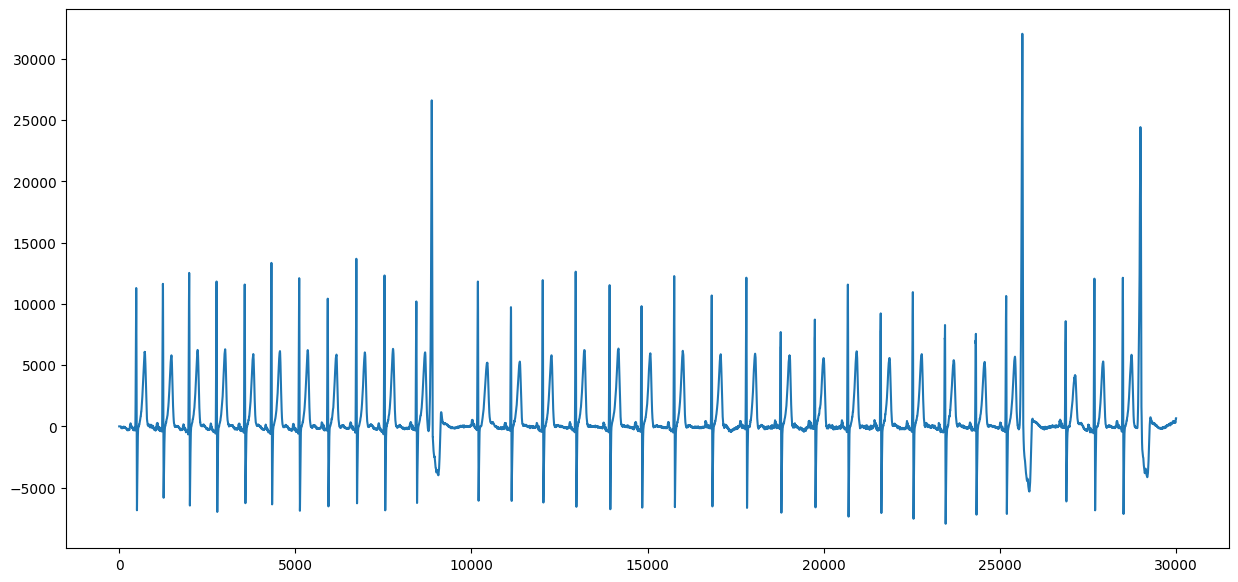

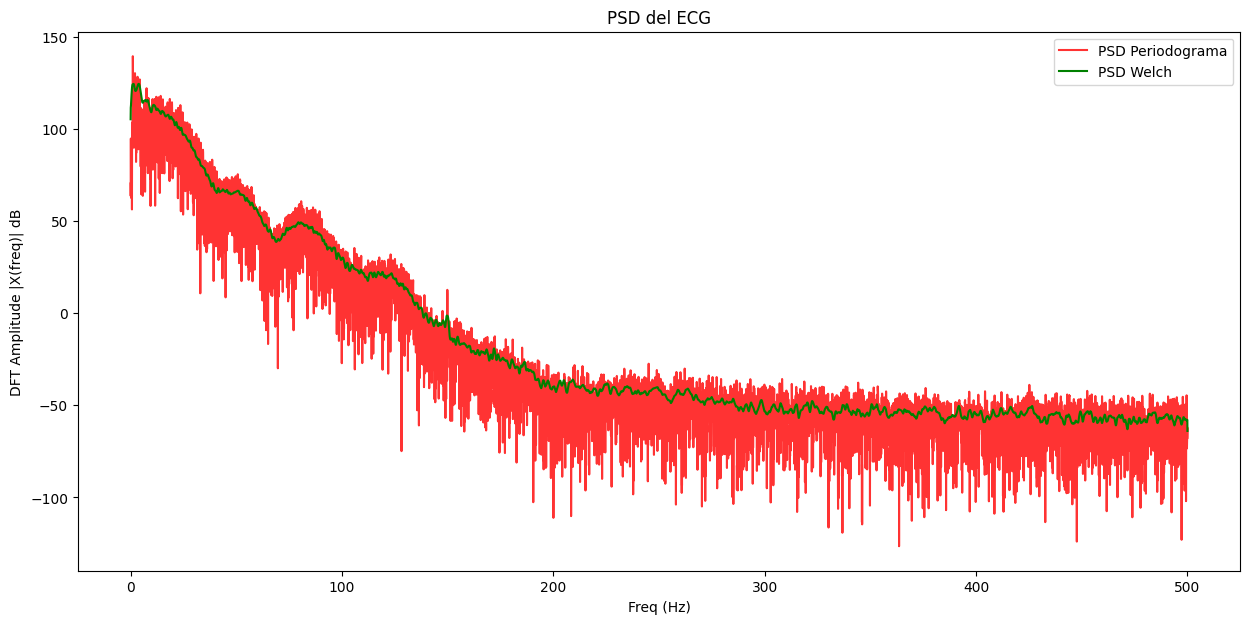

In [49]:
fs_ecg = 1000 # Hz

##################
## ECG sin ruido
##################

ecg_one_lead = np.load('ecg_sin_ruido.npy')
N_ecg = len(ecg_one_lead)
L_ecg = N_ecg//10
df_ecg = fs_ecg/N_ecg
#Ploteo la señal
plt.figure("ECG Sin Ruido",figsize=(15, 7))
plt.plot(ecg_one_lead)

ff_ecg = np.arange(0,fs_ecg,df_ecg) # grilla de frecuencia
bfrec_ecg = ff_ecg <= fs_ecg/2


#Periodograma
f_ecg_1, PSD_ECG_1 = sig.periodogram(ecg_one_lead, fs=fs_ecg, window='flattop', nfft=N_ecg, detrend='constant', return_onesided=True, scaling='density', axis=-1)
PSD_ECG_1_NORM = PSD_ECG_1/np.max(PSD_ECG_1)#Normalizo
PSD_ECG_LOG_1=10*np.log10(2*np.abs(PSD_ECG_1)**2)
#Welch
f_ecg_2, PSD_ECG_2 = sig.welch(ecg_one_lead, fs=fs_ecg, window='flattop', nperseg=L_ecg, noverlap=None, nfft=N_ecg, detrend='constant', return_onesided=True, scaling='density', axis=-1, average='mean')
PSD_ECG_2_NORM = PSD_ECG_2/np.max(PSD_ECG_2)#Normalizo
PSD_ECG_LOG_2=10*np.log10(2*np.abs(PSD_ECG_2)**2)
#Ploteo de las PSD estimadas
plt.figure("PSD de ECG Sin Ruido",figsize=(15, 7))
plt.title('PSD del ECG')
plt.plot(ff_ecg[bfrec_ecg],PSD_ECG_LOG_1,color = 'r',label="PSD Periodograma",alpha=0.8)
plt.plot(ff_ecg[bfrec_ecg],PSD_ECG_LOG_2,color = 'g',label="PSD Welch")
plt.xlabel("Freq (Hz)")
plt.ylabel("DFT Amplitude |X(freq)| dB")
plt.legend()
plt.show()

#Obtener la Estimación del BW
aprox_BW = np.cumsum(PSD_ECG_1_NORM)
aprox_BW_ecg = aprox_BW/np.max(aprox_BW)
limite_BW = np.max(aprox_BW_ecg[aprox_BW_ecg < tope_ecg])
estimacion_BW_ecg_1 = ff_ecg[np.where(aprox_BW_ecg == limite_BW)[0]]#En Hz

aprox_BW = np.cumsum(PSD_ECG_2_NORM)
aprox_BW_ecg_2 = aprox_BW/np.max(aprox_BW)
limite_BW = np.max(aprox_BW_ecg_2[aprox_BW_ecg_2 < tope_ecg])
estimacion_BW_ecg_2 = ff_ecg[np.where(aprox_BW_ecg_2 == limite_BW)[0]]#En Hz

### <ul><li>Pletismografía (PPG):</li></lu>

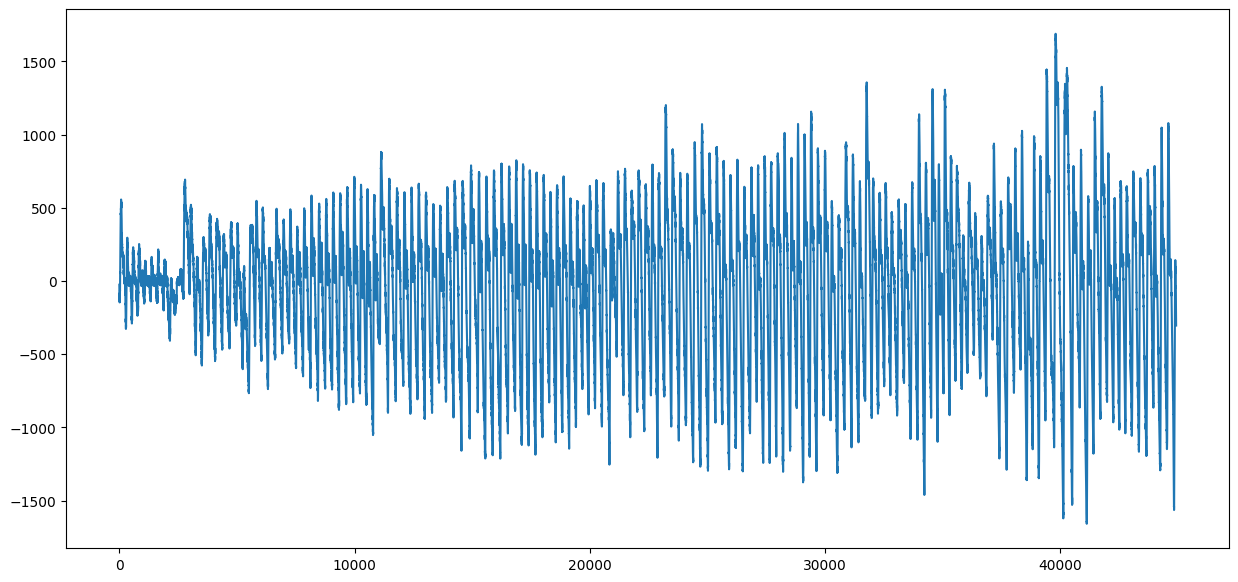

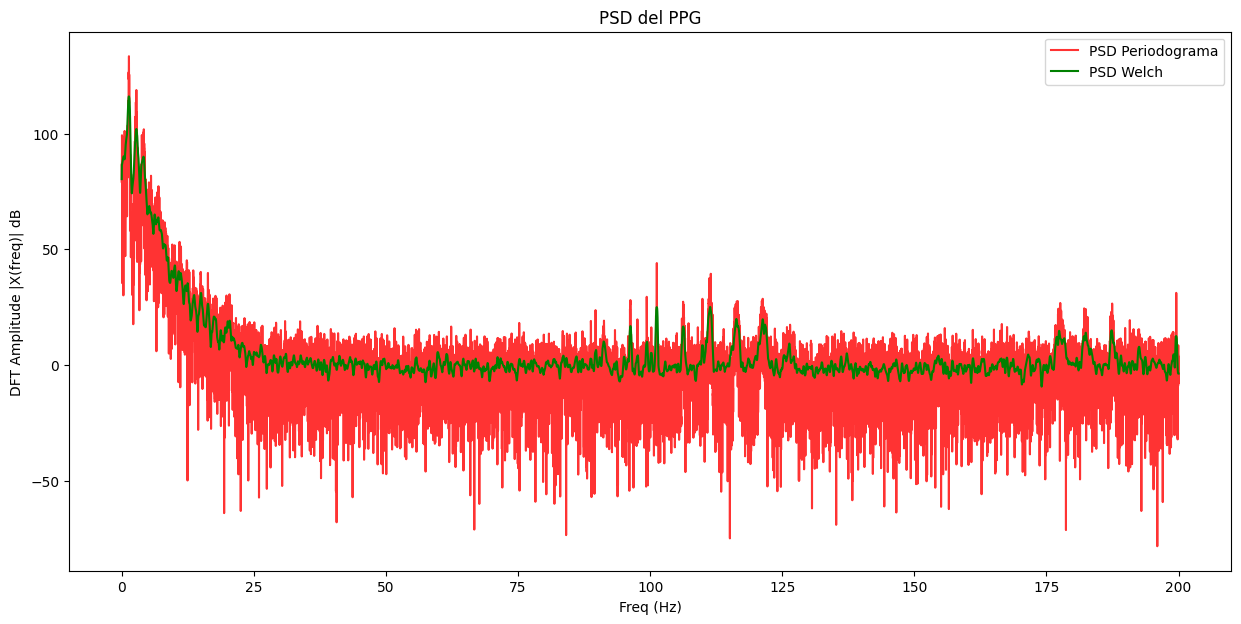

In [50]:
####################################
# Lectura de pletismografía (PPG)  #
####################################

fs_ppg = 400 # Hz

ppg = np.load('ppg_sin_ruido.npy')
N_ppg = len(ppg)
L_ppg = N_ppg//10
df_ppg = fs_ppg/N_ppg
#Ploteo la señal
plt.figure("PPG",figsize=(15, 7))
plt.plot(ppg)

ff_ppg = np.arange(0,fs_ppg,df_ppg) # grilla de frecuencia
bfrec_ppg = ff_ppg <= fs_ppg/2
#Periodograma
f_ppg_1, PSD_PPG_1 = sig.periodogram(ppg, fs=fs_ppg, window='flattop', nfft=N_ppg, detrend='constant', return_onesided=True, scaling='density', axis=-1)
PSD_PPG_1_NORM = PSD_PPG_1/np.max(PSD_PPG_1)#Normalizo
PSD_PPG_LOG_1=10*np.log10(2*np.abs(PSD_PPG_1)**2)
#Welch
f_ppg_2, PSD_PPG_2 = sig.welch(ppg, fs=fs_ppg, window='flattop', nperseg=L_ppg, noverlap=None, nfft=N_ppg, detrend='constant', return_onesided=True, scaling='density', axis=-1, average='mean')
PSD_PPG_2_NORM = PSD_PPG_2/np.max(PSD_PPG_2)#Normalizo
PSD_PPG_LOG_2=10*np.log10(2*np.abs(PSD_PPG_2)**2)

plt.figure("PSD de PPG Sin Ruido",figsize=(15, 7))
plt.title('PSD del PPG')
plt.plot(ff_ppg[bfrec_ppg],PSD_PPG_LOG_1,color = 'r',label="PSD Periodograma",alpha=0.8)
plt.plot(ff_ppg[bfrec_ppg],PSD_PPG_LOG_2,color = 'g',label="PSD Welch")
plt.xlabel("Freq (Hz)")
plt.ylabel("DFT Amplitude |X(freq)| dB")
plt.legend()
plt.show()

#Obtener la Estimación del BW
aprox_BW_1 = np.cumsum(PSD_PPG_1_NORM)
aprox_BW_ppg = aprox_BW_1/np.max(aprox_BW_1)
limite_BW_1 = np.max(aprox_BW_ppg[aprox_BW_ppg < tope_ppg])
estimacion_BW_ppg_1 = ff_ppg[np.where(aprox_BW_ppg == limite_BW_1)[0]]#En Hz

aprox_BW_1 = np.cumsum(PSD_PPG_2_NORM)
aprox_BW_ppg = aprox_BW_1/np.max(aprox_BW_1)
limite_BW_1 = np.max(aprox_BW_ppg[aprox_BW_ppg < tope_ppg])
estimacion_BW_ppg_2 = ff_ppg[np.where(aprox_BW_ppg == limite_BW_1)[0]]#En Hz

### <ul><li>Audio (La Cucaracha):</li></lu>

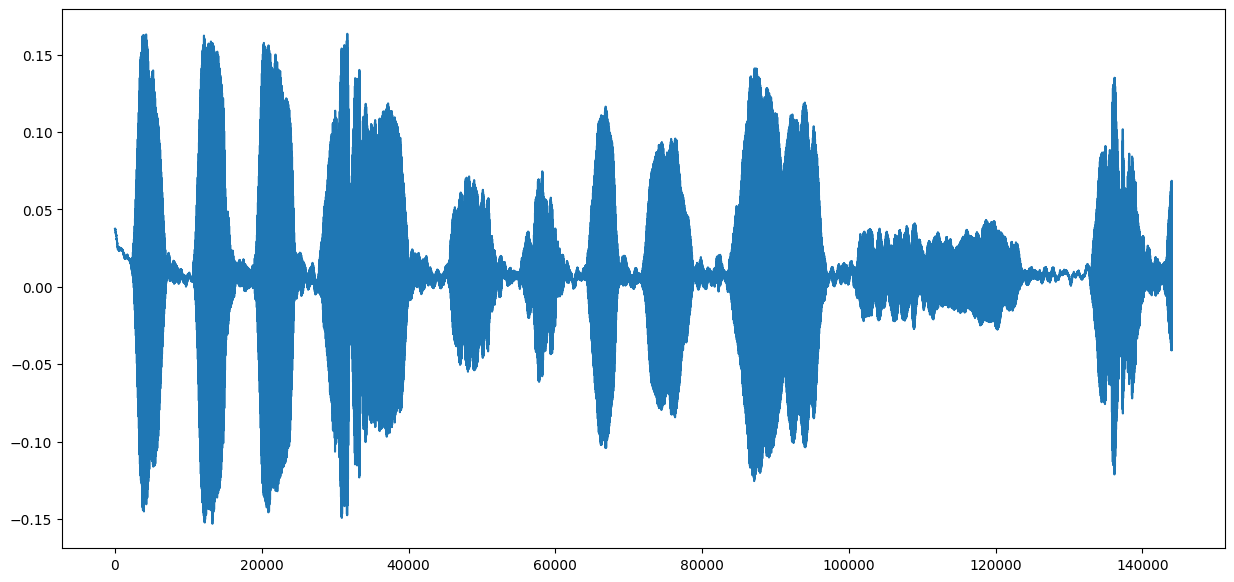

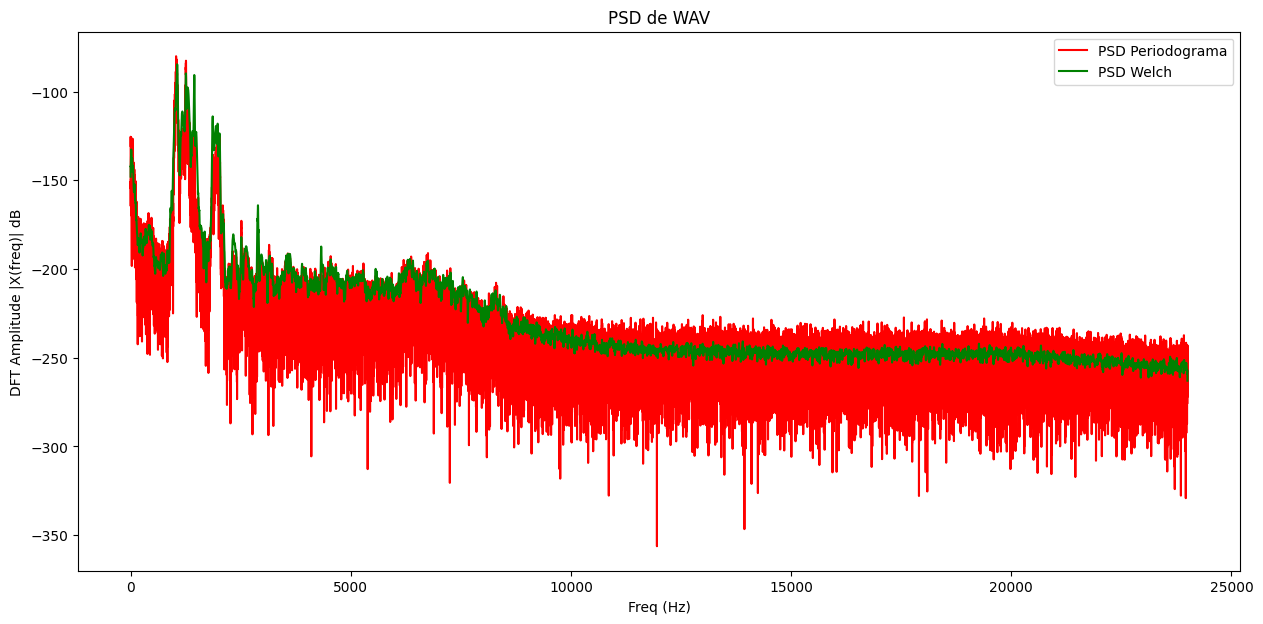

In [51]:
####################
# Lectura de audio #
####################

# Cargar el archivo CSV como un array de NumPy
fs_audio, wav_data = sio.wavfile.read('la cucaracha.wav')

N_wav = len(wav_data)
L_wav = N_wav//10
df_wav = fs_audio/N_wav
#Ploteo la señal
plt.figure("La Cucaracha",figsize=(15, 7))
plt.plot(wav_data)

ff_wav = np.arange(0,fs_audio,df_wav) # grilla de frecuencia
bfrec_wav = ff_wav <= fs_audio/2

#Periodograma
f_wav_1, PSD_WAV_1 = sig.periodogram(wav_data, fs=fs_audio, window='flattop', nfft=N_wav, detrend='constant', return_onesided=True, scaling='density', axis=-1)
PSD_WAV_1_NORM = PSD_WAV_1/np.max(PSD_WAV_1)#Normalizo
PSD_WAV_LOG_1=10*np.log10(2*np.abs(PSD_WAV_1)**2)
#Welch
f_wav_2, PSD_WAV_2 = sig.welch(wav_data, fs=fs_audio, window='flattop', nperseg=L_wav, noverlap=None, nfft=N_wav, detrend='constant', return_onesided=True, scaling='density', axis=-1, average='mean')
PSD_WAV_2_NORM = PSD_WAV_2/np.max(PSD_WAV_2)#Normalizo
PSD_WAV_LOG_2=10*np.log10(2*np.abs(PSD_WAV_2)**2)

plt.figure("PSD de WAV Sin Ruido",figsize=(15, 7))
plt.title('PSD de WAV')
plt.plot(ff_wav[bfrec_wav],PSD_WAV_LOG_1,color = 'r',label="PSD Periodograma")
plt.plot(ff_wav[bfrec_wav],PSD_WAV_LOG_2,color = 'g',label="PSD Welch")
plt.xlabel("Freq (Hz)")
plt.ylabel("DFT Amplitude |X(freq)| dB")
plt.legend()
plt.show()

#Obtener la Estimación del BW
aprox_BW_2 = np.cumsum(PSD_WAV_1_NORM)
aprox_BW_wav = aprox_BW_2/np.max(aprox_BW_2)
limite_BW_2 = np.max(aprox_BW_wav[aprox_BW_wav < tope_wav])
estimacion_BW_wav_1 = ff_wav[np.where(aprox_BW_wav == limite_BW_2)[0]]#En Hz

aprox_BW_2 = np.cumsum(PSD_WAV_2_NORM)
aprox_BW_wav = aprox_BW_2/np.max(aprox_BW_2)
limite_BW_2 = np.max(aprox_BW_wav[aprox_BW_wav < tope_wav])
estimacion_BW_wav_2 = ff_wav[np.where(aprox_BW_wav == limite_BW_2)[0]]#En Hz


In [52]:
lista_A = ['Periodograma', 'Welch']
A = np.array([estimacion_BW_ecg_1[0], estimacion_BW_ecg_2[0]])
B = np.array([estimacion_BW_ppg_1[0], estimacion_BW_ppg_2[0]])
C = np.array([estimacion_BW_wav_1[0], estimacion_BW_wav_2[0]])

In [53]:
from IPython.display import Markdown, display
from IPython.display import display, HTML
# Título
display(HTML("<h2 style='font-weight: bold; font-style: italic; text-decoration: underline; color: darkgreen;'>Estimación de Ancho de Banda</h2>"))

# Cabecera
header = f"| Método         | ECG (Hz)  | PPG (Hz)  | WAV (Hz) |\n"
separator = "| -------------- | -------- | -------- | -------- |\n"

# Cuerpo de la tabla
body = ""
for i, nombre_fila in enumerate(lista_A):
    a_val = f"{A[i]:.2f}"
    b_val = f"{B[i]:.2f}"
    c_val = f"{C[i]:.2f}"
    body += f"| {nombre_fila} | {a_val} | {b_val} | {c_val} |\n"

# Mostrar la tabla
markdown_table = header + separator + body
display(Markdown(markdown_table))

| Método         | ECG (Hz)  | PPG (Hz)  | WAV (Hz) |
| -------------- | -------- | -------- | -------- |
| Periodograma | 30.00 | 3.94 | 2035.67 |
| Welch | 28.10 | 3.91 | 2048.00 |


# Conclusiones<br>
### Al observar las 3 señales se puede notar que las tres presentan una forma de pasabajos, incluso la señal de audio. Esto facilita la obtención de la estimación del ancho de banda porque se arranca desde el origen y se busca que la suma acumulada normalizada se casi de uno, se fue variando el límite al que llegar según qué tan bien filtrada están las señales. De los tres casos en el se fue menos exigente fue específicamente en el que se asegura que no tiene ruido (PPG) y siendo más exigente en el caso del audio.

## Bonus:
#### Se realizará un análisis similar con otra señal ECG de la siguiente base de datos MIT-BIH arrhythmia database of PhysioNet (http://www.physionet.org) utilizada en un proyecto de investigación. La misma está muestreada 360 Hz con 3600 muestras

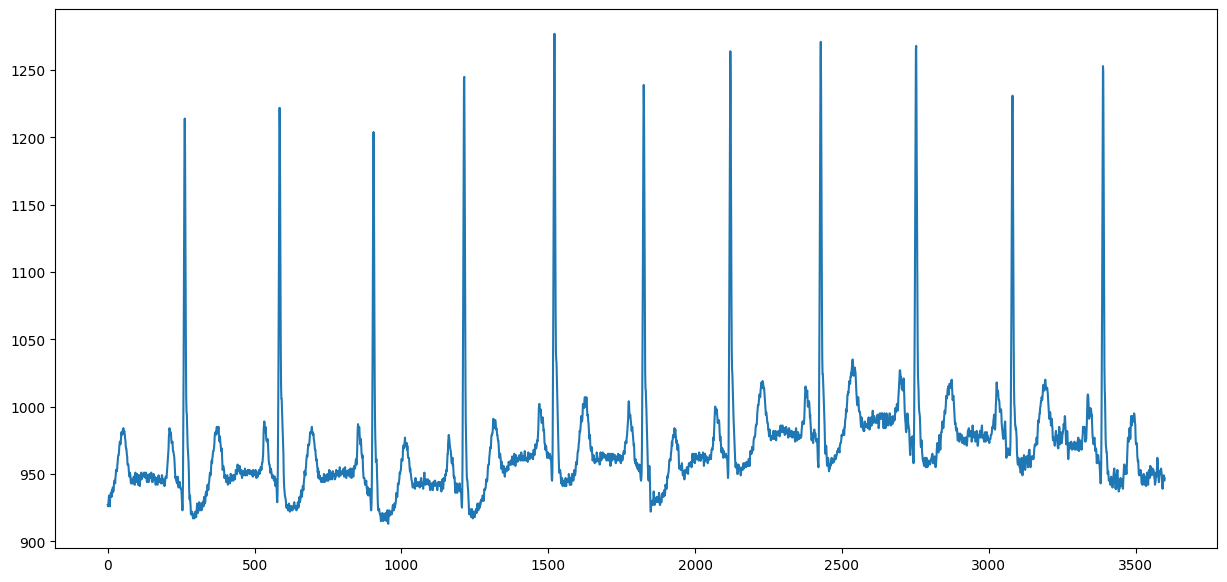

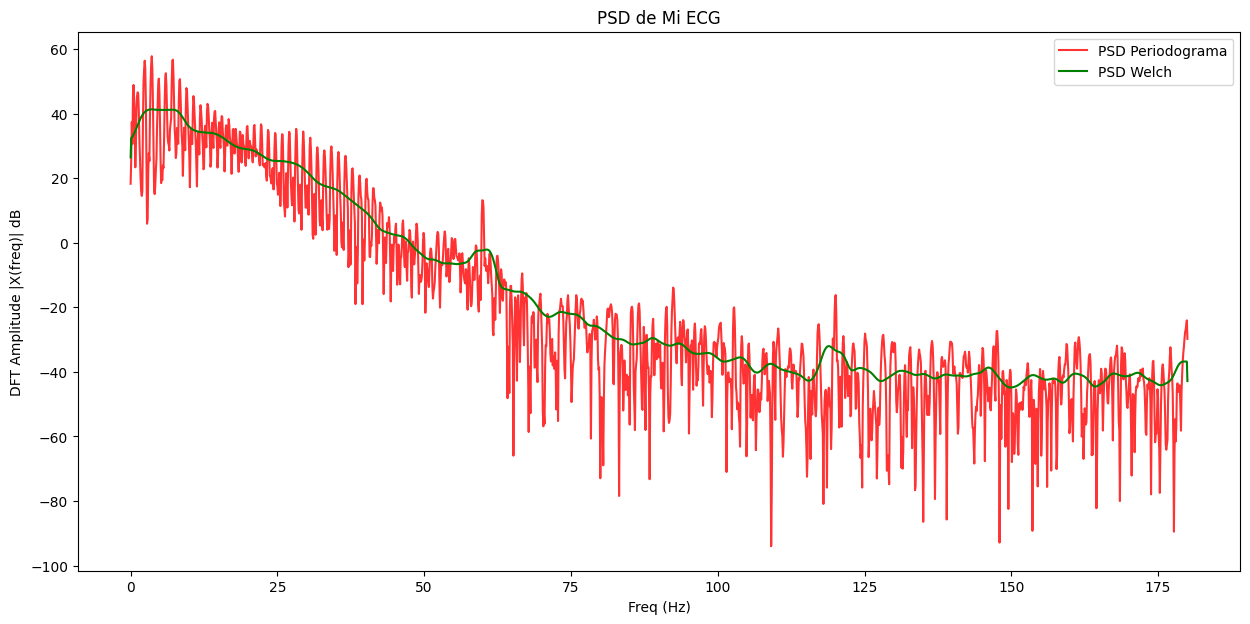

In [54]:
fs = 360 #Hz

mat_struct = sio.loadmat('101m (2).mat')
ecg_sano = mat_struct['val']
ecg_sano = ecg_sano.flatten()
N = len(ecg_sano)
L = N//10
df = fs/N
#Ploteo de la señal
plt.figure("ECG Propio",figsize=(15, 7))
plt.plot(ecg_sano)

ff = np.arange(0,fs,df) # grilla de frecuencia
bfrec = ff <= fs/2
#Periodograma
f_1, PSD_MY_ECG_1 = sig.periodogram(ecg_sano, fs=fs, window='flattop', nfft=N, detrend='constant', return_onesided=True, scaling='density', axis=-1)
PSD_MY_ECG_NORM_1 = PSD_MY_ECG_1/np.max(PSD_MY_ECG_1)#Normalizo
PSD_MY_ECG_LOG_1=10*np.log10(2*np.abs(PSD_MY_ECG_1)**2)
#Welch
f_2, PSD_MY_ECG_2 = sig.welch(ecg_sano, fs=fs, window='flattop', nperseg=L, noverlap=None, nfft=N, detrend='constant', return_onesided=True, scaling='density', axis=-1, average='mean')
PSD_MY_ECG_NORM_2 = PSD_MY_ECG_2/np.max(PSD_MY_ECG_2)#Normalizo
PSD_MY_ECG_LOG_2=10*np.log10(2*np.abs(PSD_MY_ECG_2)**2)
#Ploteo de las PSD
plt.figure("PSD Mi ECGo",figsize=(15, 7))
plt.title('PSD de Mi ECG')
plt.plot(ff[bfrec],PSD_MY_ECG_LOG_1,color = 'r',label="PSD Periodograma",alpha=0.8)
plt.plot(ff[bfrec],PSD_MY_ECG_LOG_2,color = 'g',label="PSD Welch")
plt.xlabel("Freq (Hz)")
plt.ylabel("DFT Amplitude |X(freq)| dB")
plt.legend()
plt.show()

#Obtener la Estimación del BW
aprox_BW_3 = np.cumsum(PSD_MY_ECG_NORM_1)
aprox_BW_my_ecg = aprox_BW_3/np.max(aprox_BW_3)
limite_BW_3 = np.max(aprox_BW_my_ecg[aprox_BW_my_ecg < tope_my_ecg])
estimacion_BW_my_ecg_1 = f_1[np.where(aprox_BW_my_ecg == limite_BW_3)[0]]#En Hz

aprox_BW_3 = np.cumsum(PSD_MY_ECG_NORM_2)
aprox_BW_my_ecg = aprox_BW_3/np.max(aprox_BW_3)
limite_BW_3 = np.max(aprox_BW_my_ecg[aprox_BW_my_ecg < tope_my_ecg])
estimacion_BW_my_ecg_2 = f_1[np.where(aprox_BW_my_ecg == limite_BW_3)[0]]#En Hz

In [55]:
lista_A = ['Periodograma', 'Welch']
A = np.array([estimacion_BW_ecg_1[0], estimacion_BW_ecg_2[0]])
B = np.array([estimacion_BW_ppg_1[0], estimacion_BW_ppg_2[0]])
C = np.array([estimacion_BW_wav_1[0], estimacion_BW_wav_2[0]])
D = np.array([estimacion_BW_my_ecg_1[0], estimacion_BW_my_ecg_2[0]])

from IPython.display import Markdown, display
from IPython.display import display, HTML
# Título
display(HTML("<h2 style='font-weight: bold; font-style: italic; text-decoration: underline; color: darkgreen;'>Estimación de Ancho de Banda</h2>"))

# Cabecera
header = f"| Método         | ECG (Hz)  | PPG (Hz)  | WAV (Hz) | Mi ECG (Hz)  |\n"
separator = "| -------------- | -------- | -------- | -------- | -------------|\n"

# Cuerpo de la tabla
body = ""
for i, nombre_fila in enumerate(lista_A):
    a_val = f"{A[i]:.2f}"
    b_val = f"{B[i]:.2f}"
    c_val = f"{C[i]:.2f}"
    d_val = f"{D[i]:.2f}"
    body += f"| {nombre_fila} | {a_val} | {b_val} | {c_val} | {d_val} |\n"

# Mostrar la tabla
markdown_table = header + separator + body
display(Markdown(markdown_table))

| Método         | ECG (Hz)  | PPG (Hz)  | WAV (Hz) | Mi ECG (Hz)  |
| -------------- | -------- | -------- | -------- | -------------|
| Periodograma | 30.00 | 3.94 | 2035.67 | 37.80 |
| Welch | 28.10 | 3.91 | 2048.00 | 39.70 |


### Se observa que esta señal, también como un pasabajos funciona como el ECG provisto por el docente, por lol que se optó por usar el mismo valor tope que en el primer caso y se obtuvo un ancho de banda mayor. Demostrando que aunque ambas sean el mismo tipo de señales, al tener distintas frecuencias de muestreo y cantidad de muestras presentarán características diferentes. 